# install necessary lib

In [11]:
%pip install -r requirements.txt

You should consider upgrading via the '/Users/jirayuwat/Desktop/GAN-indiv-study/env/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


# import lib

In [28]:
import torch
from torch import nn

from torchsummary import summary
from torchvision import transforms, datasets

from tqdm import tqdm

import matplotlib.pyplot as plt

import random

import numpy as np

import datetime
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'

# load data

- load as data loader 
- batch size = 128
- image pixel value [0,1]
- only 1 channel

In [13]:
SEED = 1
BATCH_SIZE = 32
TEST_BATCH_SIZE = 32
torch.manual_seed(SEED)
train_loader = torch.utils.data.DataLoader (datasets.MNIST('../dataset/', 
                                                           train=True, 
                                                           download=True,
                                                           transform= transforms.Compose([transforms.ToTensor()])
                                                           ),
                                            batch_size = BATCH_SIZE, 
                                            shuffle=True)

test_loader = torch.utils.data.DataLoader(datasets.MNIST('../dataset/', 
                                                         train=False, 
                                                         transform=transforms.Compose([transforms.ToTensor()])
                                                        ), 
                                          batch_size = TEST_BATCH_SIZE, 
                                          shuffle=True)

tensor(0.) tensor(1.)
tensor(0.) tensor(0.9961)
tensor(0.) tensor(1.)
tensor(0.) tensor(1.)
tensor(0.) tensor(1.)
tensor(0.) tensor(1.)
tensor(0.) tensor(1.)
tensor(0.) tensor(1.)
tensor(0.) tensor(1.)


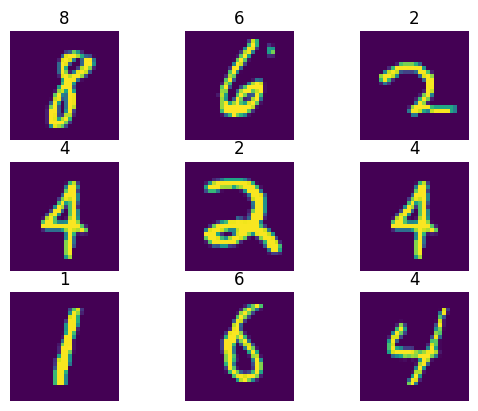

In [14]:
img, label = next(iter(train_loader))
import random
for i in range(9):
    idx = random.randint(0,BATCH_SIZE-1)
    plt.subplot(3, 3, i+1)
    plt.imshow(img[idx].reshape(28,28,1))
    plt.axis('off')
    plt.title(label[idx].item())
    print(torch.min(img[idx]), torch.max(img[idx]))


# TRAIN CONTROL

In [15]:
NOISE_SIZE = 64

# Uncondition GAN
UG_EPOCHS = 100

# Uncondition GAN

## Ref

- [github](https://github.com/aladdinpersson/Machine-Learning-Collection/tree/master/ML/Pytorch/GANs)

## Define model

In [16]:
class Uncondition_Generator(nn.Module):
    def __init__(self, z_dim=NOISE_SIZE, img_dim=28*28*1):
        super().__init__()
        self.gen = nn.Sequential(
            nn.Linear(z_dim, 256),
            nn.LeakyReLU(0.01),
            nn.Linear(256, img_dim),
            nn.Tanh(),  # normalize inputs to [-1, 1] so make outputs [-1, 1]
        )

    def forward(self, x):
        return self.gen(x)
    
summary(Uncondition_Generator(), (1, NOISE_SIZE))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1               [-1, 1, 256]          16,640
         LeakyReLU-2               [-1, 1, 256]               0
            Linear-3               [-1, 1, 784]         201,488
              Tanh-4               [-1, 1, 784]               0
Total params: 218,128
Trainable params: 218,128
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.02
Params size (MB): 0.83
Estimated Total Size (MB): 0.85
----------------------------------------------------------------


In [17]:
class Uncondition_Discriminator(nn.Module):
    def __init__(self, in_features = 784):
        super().__init__()
        self.disc = nn.Sequential(
            nn.Linear(in_features, 128),
            nn.LeakyReLU(0.01),
            nn.Linear(128, 1),
            nn.Sigmoid(),
        )

    def forward(self, x):
        return self.disc(x)

summary(Uncondition_Discriminator(), (1, 784))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1               [-1, 1, 128]         100,480
         LeakyReLU-2               [-1, 1, 128]               0
            Linear-3                 [-1, 1, 1]             129
           Sigmoid-4                 [-1, 1, 1]               0
Total params: 100,609
Trainable params: 100,609
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.38
Estimated Total Size (MB): 0.39
----------------------------------------------------------------


## Create instance and train model

In [18]:
UGAN_gen = Uncondition_Generator().to(DEVICE)
UGAN_gen_optim = torch.optim.Adam(params=UGAN_gen.parameters(), lr=3e-4)

UGAN_dis = Uncondition_Discriminator().to(DEVICE)
UGAN_dis_optim = torch.optim.Adam(params=UGAN_dis.parameters(), lr=3e-4)

criterion = nn.BCELoss()

EPOCH 0/100: 1875it [00:06, 275.92it/s, dis_loss=0.673, gen_loss=0.7]  


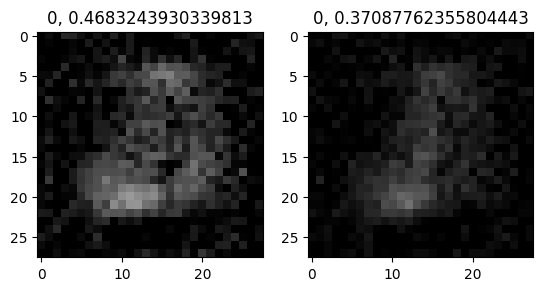

EPOCH 1/100: 1875it [00:06, 281.79it/s, dis_loss=0.477, gen_loss=1.17] 
EPOCH 2/100: 1875it [00:06, 288.93it/s, dis_loss=0.502, gen_loss=1.18] 
EPOCH 3/100: 1875it [00:06, 292.01it/s, dis_loss=0.355, gen_loss=1.25] 
EPOCH 4/100: 1875it [00:06, 289.68it/s, dis_loss=0.396, gen_loss=1.41] 
EPOCH 5/100: 1875it [00:06, 270.25it/s, dis_loss=0.462, gen_loss=1.12] 
EPOCH 6/100: 1875it [00:06, 298.85it/s, dis_loss=0.77, gen_loss=1.12]  
EPOCH 7/100: 1875it [00:06, 284.06it/s, dis_loss=0.446, gen_loss=0.867]
EPOCH 8/100: 1875it [00:07, 266.18it/s, dis_loss=0.557, gen_loss=1.1]  
EPOCH 9/100: 1875it [00:06, 296.84it/s, dis_loss=0.604, gen_loss=1.16] 
EPOCH 10/100: 1875it [00:06, 292.36it/s, dis_loss=0.697, gen_loss=0.913]


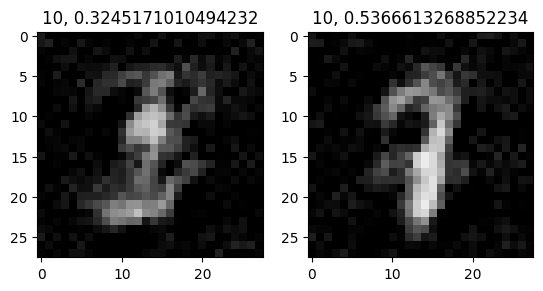

EPOCH 11/100: 1875it [00:06, 292.82it/s, dis_loss=0.551, gen_loss=1.15] 
EPOCH 12/100: 1875it [00:06, 293.96it/s, dis_loss=0.606, gen_loss=1.12] 
EPOCH 13/100: 1875it [00:06, 288.00it/s, dis_loss=0.549, gen_loss=1.05] 
EPOCH 14/100: 1875it [00:06, 299.22it/s, dis_loss=0.471, gen_loss=1.12] 
EPOCH 15/100: 1875it [00:06, 292.73it/s, dis_loss=0.585, gen_loss=0.824]
EPOCH 16/100: 1875it [00:06, 284.29it/s, dis_loss=0.612, gen_loss=1]    
EPOCH 17/100: 1875it [00:06, 298.02it/s, dis_loss=0.638, gen_loss=1.01] 
EPOCH 18/100: 1875it [00:06, 286.73it/s, dis_loss=0.655, gen_loss=0.861]
EPOCH 19/100: 1875it [00:06, 288.62it/s, dis_loss=0.552, gen_loss=0.938]
EPOCH 20/100: 1875it [00:06, 295.89it/s, dis_loss=0.583, gen_loss=1.11] 


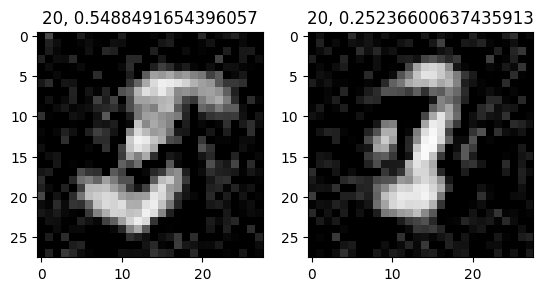

EPOCH 21/100: 1875it [00:06, 291.57it/s, dis_loss=0.623, gen_loss=0.928]
EPOCH 22/100: 1875it [00:06, 293.22it/s, dis_loss=0.595, gen_loss=1.27] 
EPOCH 23/100: 1875it [00:06, 299.50it/s, dis_loss=0.53, gen_loss=1.12]  
EPOCH 24/100: 1875it [00:06, 288.86it/s, dis_loss=0.546, gen_loss=0.99] 
EPOCH 25/100: 1875it [00:06, 287.81it/s, dis_loss=0.574, gen_loss=1.08] 
EPOCH 26/100: 1875it [00:06, 299.19it/s, dis_loss=0.697, gen_loss=0.852]
EPOCH 27/100: 1875it [00:06, 284.48it/s, dis_loss=0.731, gen_loss=0.834]
EPOCH 28/100: 1875it [00:06, 290.49it/s, dis_loss=0.549, gen_loss=1.11] 
EPOCH 29/100: 1875it [00:06, 293.04it/s, dis_loss=0.566, gen_loss=1.22] 
EPOCH 30/100: 1875it [00:06, 282.94it/s, dis_loss=0.438, gen_loss=1.05] 


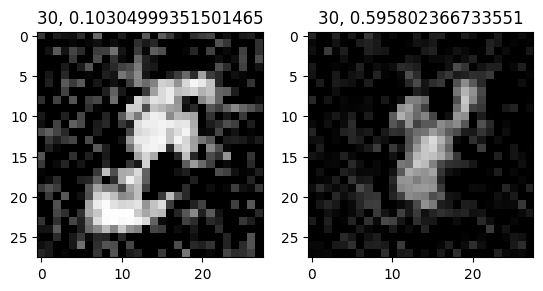

EPOCH 31/100: 1875it [00:06, 294.84it/s, dis_loss=0.6, gen_loss=0.982]  
EPOCH 32/100: 1875it [00:06, 286.31it/s, dis_loss=0.669, gen_loss=0.868]
EPOCH 33/100: 1875it [00:06, 281.23it/s, dis_loss=0.594, gen_loss=1.15] 
EPOCH 34/100: 1875it [00:06, 292.75it/s, dis_loss=0.638, gen_loss=0.955]
EPOCH 35/100: 1875it [00:06, 288.91it/s, dis_loss=0.617, gen_loss=0.788]
EPOCH 36/100: 1875it [00:06, 282.41it/s, dis_loss=0.576, gen_loss=1.1]  
EPOCH 37/100: 1875it [00:06, 291.31it/s, dis_loss=0.646, gen_loss=0.986]
EPOCH 38/100: 1875it [00:06, 294.64it/s, dis_loss=0.629, gen_loss=0.959]
EPOCH 39/100: 1875it [00:06, 282.15it/s, dis_loss=0.651, gen_loss=1.12] 
EPOCH 40/100: 1875it [00:06, 294.05it/s, dis_loss=0.686, gen_loss=0.951]


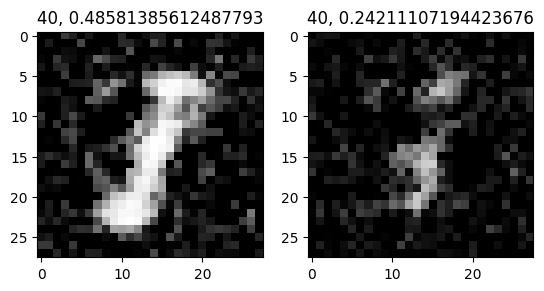

EPOCH 41/100: 1875it [00:06, 290.60it/s, dis_loss=0.625, gen_loss=0.952]
EPOCH 42/100: 1875it [00:06, 295.27it/s, dis_loss=0.604, gen_loss=0.79] 
EPOCH 43/100: 1875it [00:06, 301.08it/s, dis_loss=0.582, gen_loss=0.836]
EPOCH 44/100: 1875it [00:06, 289.35it/s, dis_loss=0.596, gen_loss=0.926]
EPOCH 45/100: 1875it [00:06, 296.61it/s, dis_loss=0.662, gen_loss=0.797]
EPOCH 46/100: 1875it [00:06, 300.12it/s, dis_loss=0.529, gen_loss=1.13] 
EPOCH 47/100: 1875it [00:06, 285.47it/s, dis_loss=0.588, gen_loss=0.933]
EPOCH 48/100: 1875it [00:06, 277.65it/s, dis_loss=0.667, gen_loss=0.96] 
EPOCH 49/100: 1875it [00:06, 283.15it/s, dis_loss=0.564, gen_loss=0.828]
EPOCH 50/100: 1875it [00:07, 264.30it/s, dis_loss=0.621, gen_loss=0.903]


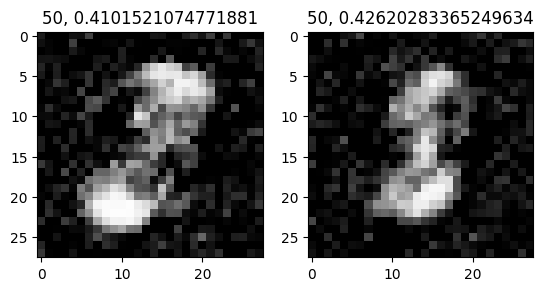

EPOCH 51/100: 1875it [00:06, 292.35it/s, dis_loss=0.613, gen_loss=1.06] 
EPOCH 52/100: 1875it [00:06, 298.04it/s, dis_loss=0.739, gen_loss=0.895]
EPOCH 53/100: 1875it [00:06, 293.50it/s, dis_loss=0.679, gen_loss=0.879]
EPOCH 54/100: 1875it [00:06, 282.81it/s, dis_loss=0.626, gen_loss=0.842]
EPOCH 55/100: 1875it [00:06, 302.43it/s, dis_loss=0.61, gen_loss=0.879] 
EPOCH 56/100: 1875it [00:06, 291.09it/s, dis_loss=0.595, gen_loss=0.909]
EPOCH 57/100: 1875it [00:06, 291.98it/s, dis_loss=0.664, gen_loss=0.855]
EPOCH 58/100: 1875it [00:06, 299.60it/s, dis_loss=0.73, gen_loss=0.87]  
EPOCH 59/100: 1875it [00:06, 291.89it/s, dis_loss=0.669, gen_loss=1]    
EPOCH 60/100: 1875it [00:06, 284.24it/s, dis_loss=0.704, gen_loss=0.905]


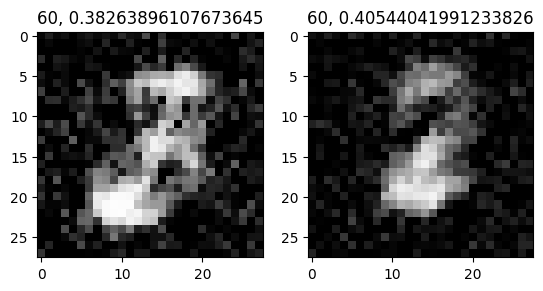

EPOCH 61/100: 1875it [00:06, 292.40it/s, dis_loss=0.668, gen_loss=0.907]
EPOCH 62/100: 1875it [00:06, 287.23it/s, dis_loss=0.682, gen_loss=0.945]
EPOCH 63/100: 1875it [00:06, 293.95it/s, dis_loss=0.523, gen_loss=0.81] 
EPOCH 64/100: 1875it [00:06, 298.55it/s, dis_loss=0.626, gen_loss=0.818]
EPOCH 65/100: 1875it [00:06, 288.46it/s, dis_loss=0.636, gen_loss=0.819]
EPOCH 66/100: 1875it [00:06, 287.99it/s, dis_loss=0.507, gen_loss=0.969]
EPOCH 67/100: 1875it [00:06, 296.50it/s, dis_loss=0.672, gen_loss=0.783]
EPOCH 68/100: 1875it [00:06, 284.82it/s, dis_loss=0.716, gen_loss=0.791]
EPOCH 69/100: 1875it [00:06, 292.95it/s, dis_loss=0.675, gen_loss=0.864]
EPOCH 70/100: 1875it [00:06, 287.62it/s, dis_loss=0.669, gen_loss=0.804]


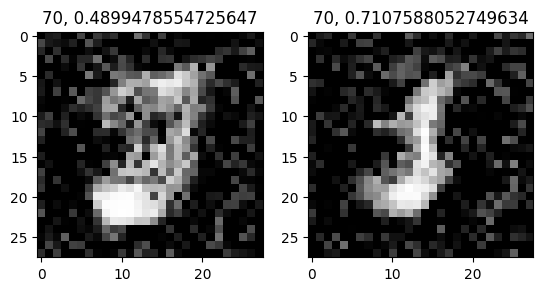

EPOCH 71/100: 1875it [00:06, 278.13it/s, dis_loss=0.641, gen_loss=0.785]
EPOCH 72/100: 1875it [00:06, 291.30it/s, dis_loss=0.667, gen_loss=0.788]
EPOCH 73/100: 1875it [00:06, 294.53it/s, dis_loss=0.653, gen_loss=0.807]
EPOCH 74/100: 1875it [00:06, 284.29it/s, dis_loss=0.685, gen_loss=0.769]
EPOCH 75/100: 1875it [00:06, 278.70it/s, dis_loss=0.652, gen_loss=0.805]
EPOCH 76/100: 1875it [00:06, 271.82it/s, dis_loss=0.653, gen_loss=0.782]
EPOCH 77/100: 1875it [00:07, 265.75it/s, dis_loss=0.643, gen_loss=0.795]
EPOCH 78/100: 1875it [00:06, 277.17it/s, dis_loss=0.659, gen_loss=0.914]
EPOCH 79/100: 1875it [00:06, 299.89it/s, dis_loss=0.68, gen_loss=0.757] 
EPOCH 80/100: 1875it [00:06, 293.14it/s, dis_loss=0.668, gen_loss=0.791]


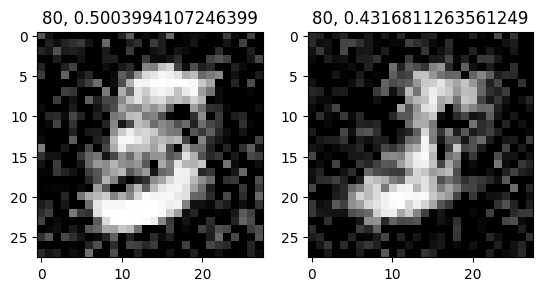

EPOCH 81/100: 1875it [00:06, 295.32it/s, dis_loss=0.784, gen_loss=0.712]
EPOCH 82/100: 1875it [00:06, 293.29it/s, dis_loss=0.662, gen_loss=0.78] 
EPOCH 83/100: 1875it [00:06, 297.46it/s, dis_loss=0.68, gen_loss=0.777] 
EPOCH 84/100: 1875it [00:06, 301.78it/s, dis_loss=0.647, gen_loss=0.751]
EPOCH 85/100: 1875it [00:06, 293.12it/s, dis_loss=0.654, gen_loss=0.837]
EPOCH 86/100: 1875it [00:06, 298.34it/s, dis_loss=0.658, gen_loss=0.776]
EPOCH 87/100: 1875it [00:06, 300.93it/s, dis_loss=0.603, gen_loss=0.777]
EPOCH 88/100: 1875it [00:06, 300.19it/s, dis_loss=0.727, gen_loss=0.754]
EPOCH 89/100: 1875it [00:06, 292.65it/s, dis_loss=0.696, gen_loss=0.756]
EPOCH 90/100: 1875it [00:06, 295.68it/s, dis_loss=0.656, gen_loss=0.714]


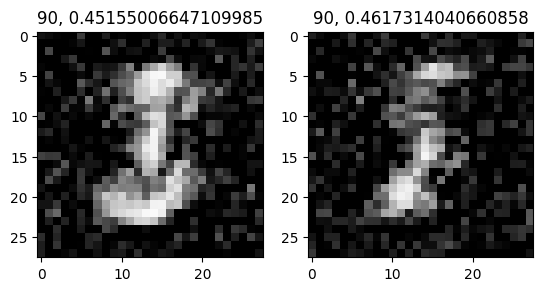

EPOCH 91/100: 1875it [00:06, 276.52it/s, dis_loss=0.684, gen_loss=0.683]
EPOCH 92/100: 1875it [00:06, 278.25it/s, dis_loss=0.667, gen_loss=0.758]
EPOCH 93/100: 1875it [00:06, 298.96it/s, dis_loss=0.672, gen_loss=0.712]
EPOCH 94/100: 1875it [00:06, 283.13it/s, dis_loss=0.637, gen_loss=0.723]
EPOCH 95/100: 1875it [00:06, 298.09it/s, dis_loss=0.682, gen_loss=0.763]
EPOCH 96/100: 1875it [00:06, 291.30it/s, dis_loss=0.692, gen_loss=0.894]
EPOCH 97/100: 1875it [00:06, 287.32it/s, dis_loss=0.625, gen_loss=0.789]
EPOCH 98/100: 1875it [00:06, 298.46it/s, dis_loss=0.705, gen_loss=0.85] 
EPOCH 99/100: 1875it [00:06, 292.61it/s, dis_loss=0.661, gen_loss=0.796]


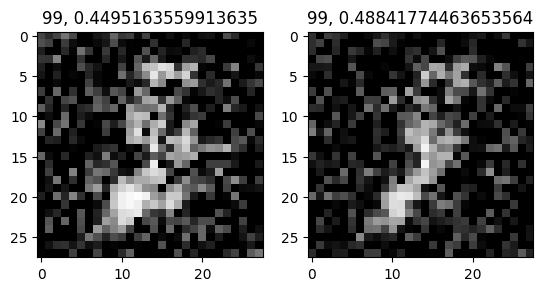

In [19]:
FIXED_NOISE1 = torch.randn((1, NOISE_SIZE))
FIXED_NOISE2 = torch.randn((1, NOISE_SIZE))

for epoch in range(UG_EPOCHS):
    loop = tqdm(enumerate(train_loader), desc=f'EPOCH {epoch}/{UG_EPOCHS}')
    for batch_idx, (real_batch, _) in loop:
        real_batch = real_batch.view(-1, 784).to(DEVICE)

        #-------------------------
        # train discriminator
        #-------------------------

        # call model.train
        UGAN_dis.train()
        UGAN_gen.eval()

        # do a forward pass
        noise_batch = torch.randn((real_batch.detach().shape[0],NOISE_SIZE))
        fake_batch = UGAN_gen.forward(noise_batch.detach())

        input_x = torch.concatenate([real_batch.detach(), 
                                     fake_batch])
        input_y = torch.concatenate([torch.ones(real_batch.detach().shape[0]),
                                     torch.zeros(fake_batch.shape[0])])
        
        y_pred = UGAN_dis.forward(input_x).reshape(-1)
        # calculate the loss
        dis_loss = criterion(y_pred, input_y)

        # optimizer zero grad
        UGAN_dis_optim.zero_grad()

        # losss backward
        dis_loss.backward()

        # optimizer step
        UGAN_dis_optim.step()

        #-------------------------
        # train generator
        #-------------------------

        # call model.train
        UGAN_dis.eval()
        UGAN_gen.train()

        # do a forward pass
        noise_batch = torch.randn((real_batch.detach().shape[0],NOISE_SIZE))
        fake_batch = UGAN_gen.forward(noise_batch.detach())

        dis_pred = UGAN_dis.forward(fake_batch).reshape(-1)

        # calculate the loss
        gen_loss = criterion(dis_pred, torch.ones_like(dis_pred))

        # optimizer zero grad
        UGAN_gen_optim.zero_grad()

        # losss backward
        gen_loss.backward()

        # optimizer step
        UGAN_gen_optim.step()
        
        #------------------------
        # eval
        #------------------------

        # call model eval
        UGAN_dis.eval()
        UGAN_gen.eval()

        # with inference mode
        with torch.inference_mode():
            loop.set_postfix({
                'dis_loss' : dis_loss.item(),
                'gen_loss' : gen_loss.item()
            })
    UGAN_gen.eval()
    UGAN_dis.eval()
    gen1 = UGAN_gen.forward(FIXED_NOISE1).detach()
    gen2 = UGAN_gen.forward(FIXED_NOISE2).detach()
    plt.subplot(1, 2, 1)
    plt.imshow(gen1.reshape((28, 28, 1)), cmap='gray', vmin=0, vmax=1)
    plt.title(f'{epoch}, {UGAN_dis.forward(gen1).item()}')
    plt.subplot(1, 2, 2)
    plt.imshow(gen2.reshape((28, 28, 1)), cmap='gray', vmin=0, vmax=1)
    plt.title(f'{epoch}, {UGAN_dis.forward(gen2).item()}')
    plt.savefig(f'./Uncondition_GAN_eval_image/epoch_{epoch}.png')
    if epoch % 10 == 0:
        plt.show()

In [29]:
# save model
torch.save(UGAN_dis, f'./model/Uncondition_GAN_discriminator_{datetime.datetime.now()}.pt')
torch.save(UGAN_gen, f'./model/Uncondition_GAN_generator_{datetime.datetime.now()}.pt')

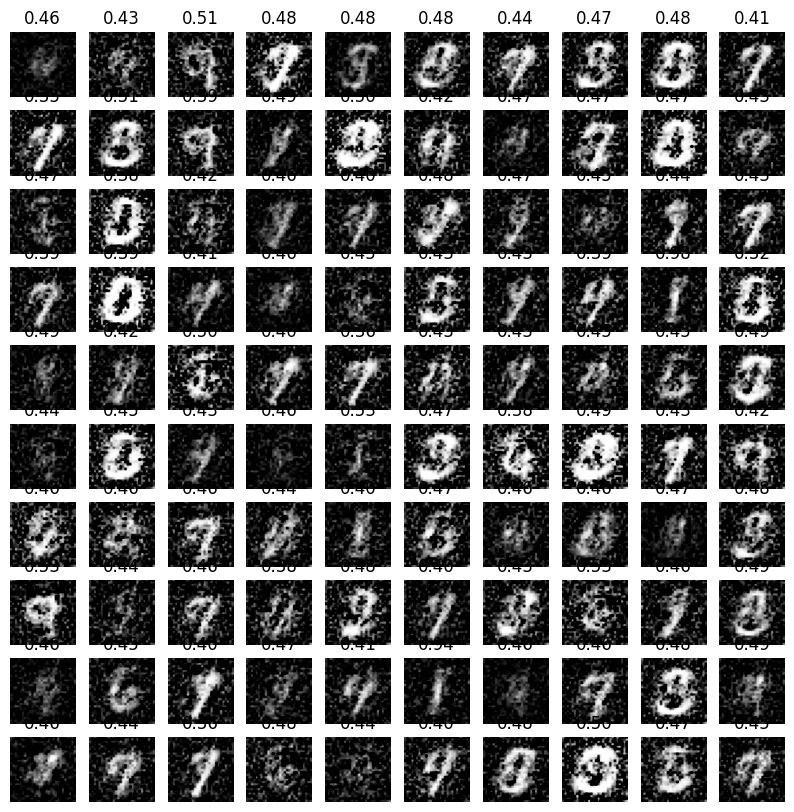

In [26]:
plt.figure(figsize=(10, 10))
for _ in range(100):
    UGAN_dis.eval()
    UGAN_gen.eval()
    plt.subplot(10, 10, _+1)
    noise = torch.randn((1, NOISE_SIZE))
    fake_gen = UGAN_gen(noise).detach()
    fake_img = fake_gen.reshape((28, 28, 1))
    confidence = UGAN_dis(fake_gen)
    plt.imshow(fake_img, cmap='gray', vmin=0, vmax=1)
    plt.title(f'{confidence.item():.2f}')
    plt.axis('off')
plt.savefig('result.png')
plt.show()